# Load and Inspect the Data

In [3]:
import pandas as pd

# Load the data from the Excel file
file_path = 'Processed Dataset G1 and G2.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.columns


(   Facilitating Condition  Subjective Norms  Organizational Justice  \
 0                     3.0              3.00                     3.0   
 1                     2.0              1.00                     2.0   
 2                     3.0              2.00                     2.5   
 3                     1.0              1.25                     1.5   
 4                     3.0              3.00                     2.0   
 
    Attitude toward Cyberslacking  Cyberslacking Self-Efficacy  \
 0                            3.0                         3.00   
 1                            1.0                         1.25   
 2                            2.0                         2.00   
 3                            1.0                         1.00   
 4                            3.0                         3.00   
 
    Conscientiousness  Personality Traits  Job Stress  Cyberslacking  \
 0                3.0            3.000000        3.00            3.0   
 1                2.0   

In [4]:
# Check for missing values in the dataset
missing_data = data.isnull().sum()

# Check data types to ensure they are appropriate for analysis
data_types = data.dtypes

missing_data, data_types


(Facilitating Condition                      0
 Subjective Norms                            0
 Organizational Justice                      0
 Attitude toward Cyberslacking               0
 Cyberslacking Self-Efficacy                 0
 Conscientiousness                           0
 Personality Traits                          0
 Job Stress                                  0
 Cyberslacking                               0
 Increased Security Risk                     0
 Gender                                      0
 Age                                         0
 Education                                   0
 Monthly Income                              0
 Work experience in business organization    0
 dtype: int64,
 Facilitating Condition                      float64
 Subjective Norms                            float64
 Organizational Justice                      float64
 Attitude toward Cyberslacking               float64
 Cyberslacking Self-Efficacy                 float64
 Conscientiousn

C:\Users\nafem\AppData\Local\Temp\ipykernel_3088\1864423129.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


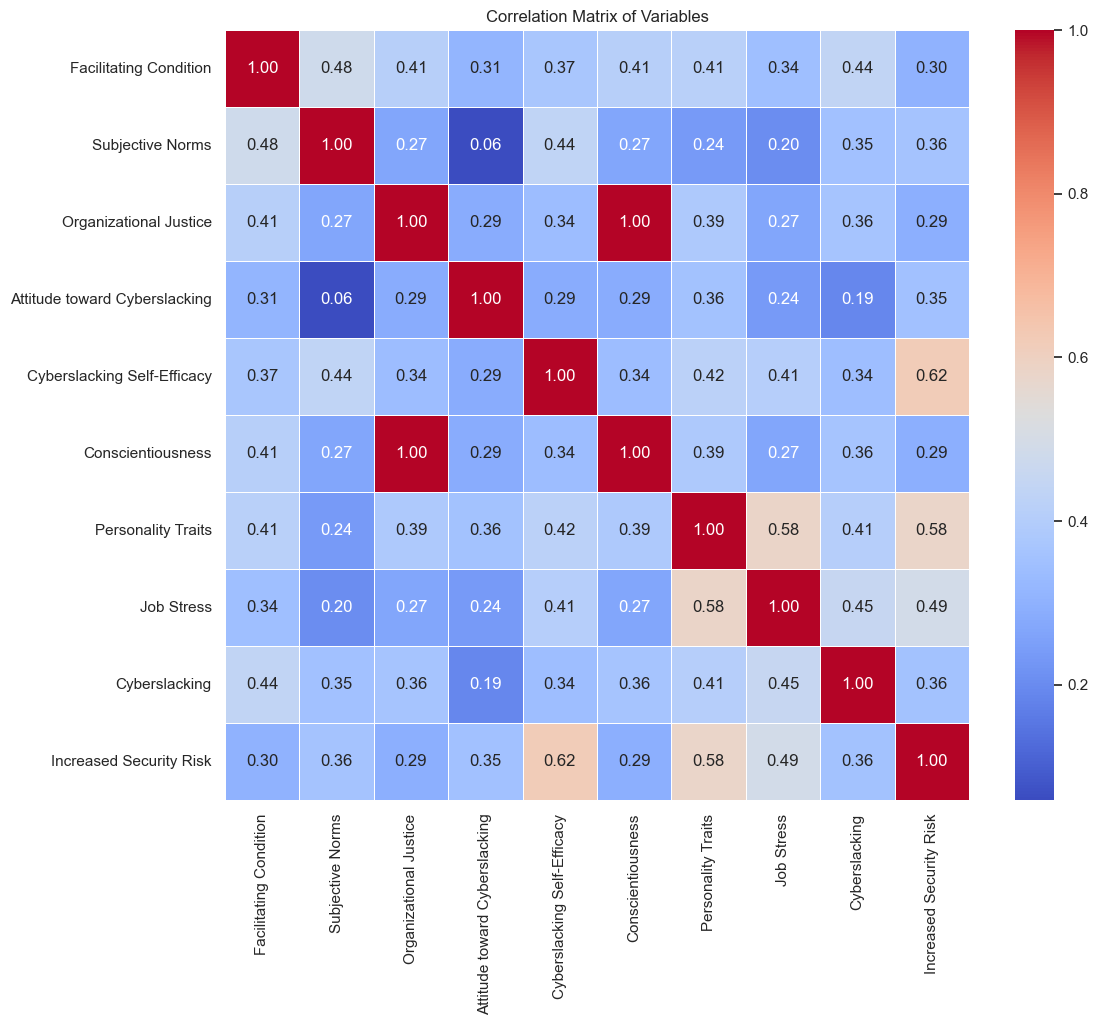

(       Facilitating Condition  Subjective Norms  Organizational Justice  \
 count               95.000000         95.000000               95.000000   
 mean                 1.928947          1.978947                1.963158   
 std                  0.595487          0.699224                0.537142   
 min                  1.000000          1.000000                1.000000   
 25%                  1.500000          1.500000                1.625000   
 50%                  2.000000          2.000000                2.000000   
 75%                  2.250000          2.500000                2.250000   
 max                  3.000000          3.000000                3.000000   
 
        Attitude toward Cyberslacking  Cyberslacking Self-Efficacy  \
 count                      95.000000                    95.000000   
 mean                        1.863158                     1.715789   
 std                         0.670194                     0.663055   
 min                         1.000

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Descriptive statistics for the numeric variables
descriptive_stats = data.describe()

# Correlation matrix for the numeric variables
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()

descriptive_stats, correlation_matrix


In [6]:
import statsmodels.api as sm

# Preparing data for regression analysis
# Independent variables
X = data.drop(columns=['Cyberslacking', 'Increased Security Risk', 'Gender', 'Age', 'Education', 'Monthly Income', 'Work experience in business organization'])
# Adding constant term for intercept
X = sm.add_constant(X)

# Dependent variable for Cyberslacking
y_cyberslacking = data['Cyberslacking']

# Fit the regression model
model_cyberslacking = sm.OLS(y_cyberslacking, X).fit()

# Summary of the regression model for 'Cyberslacking'
model_cyberslacking.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Cyberslacking   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     6.450
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           4.00e-06
Time:                        16:47:49   Log-Likelihood:                -77.905
No. Observations:                  95   AIC:                             171.8
Df Residuals:                      87   BIC:                             192.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.4761      0.288      1.651      0.102      -0.097       1.049
Facilitating Condition            0.2114      0.128      1.654      0.102      -0.043       0.465
Subjective Norms                  0.1360      0.104      1.311      0.193      -0.070       0.342
Organizational Justice            0.0905      0.064      1.420      0.159      -0.036       0.217
Attitude toward Cyberslacking    -0.0158      0.099     -0.159      0.874      -0.213       0.181
Cyberslacking Self-Efficacy       0.0247      0.111      0.222      0.825      -0.197       0.246
Conscientiousness                 0.0905      0.064      1.420      0.159      -0.036       0.217
Personality Traits                0.0894      0.133      0.671      0.504      -0.175       0.354
Job Stress                        0.2914      0.119      2.451      0.016       0.055       0.528
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   2.369
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.970
Skew:                           0.125   Prob(JB):                        0.616
Kurtosis:                       2.573   Cond. No.                     4.96e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [7]:
# Dependent variable for Increased Security Risk
y_security_risk = data['Increased Security Risk']

# Fit the regression model
model_security_risk = sm.OLS(y_security_risk, X).fit()

# Summary of the regression model for 'Increased Security Risk'
model_security_risk.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Increased Security Risk   R-squared:                       0.542
Model:                                 OLS   Adj. R-squared:                  0.505
Method:                      Least Squares   F-statistic:                     14.69
Date:                     Tue, 23 Apr 2024   Prob (F-statistic):           1.71e-12
Time:                             16:48:02   Log-Likelihood:                -54.067
No. Observations:                       95   AIC:                             124.1
Df Residuals:                           87   BIC:                             144.6
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0114      0.224      0.051      0.960      -0.435       0.457
Facilitating Condition           -0.1228      0.099     -1.235      0.220      -0.320       0.075
Subjective Norms                  0.1306      0.081      1.618      0.109      -0.030       0.291
Organizational Justice           -0.0127      0.050     -0.256      0.799      -0.111       0.086
Attitude toward Cyberslacking     0.1248      0.077      1.618      0.109      -0.029       0.278
Cyberslacking Self-Efficacy       0.3619      0.087      4.176      0.000       0.190       0.534
Conscientiousness                -0.0127      0.050     -0.256      0.799      -0.111       0.086
Personality Traits                0.3331      0.104      3.213      0.002       0.127       0.539
Job Stress                        0.1403      0.092      1.517      0.133      -0.044       0.324
==============================================================================
Omnibus:                        0.515   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.659
Skew:                           0.086   Prob(JB):                        0.719
Kurtosis:                       2.630   Cond. No.                     4.96e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""